1. Goals:
The primary goal of this project is to explore the relationship between the GDP (Gross Domestic Product) and life expectancy in six specific countries.

2. Data:
The data is from the World Health Organization (WHO) and the World Bank.

3. Analysis:
Has life expectancy increased over time in the six nations?
Has GDP increased over time in the six nations?
Is there a correlation between GDP and life expectancy of country?
What is the distribution of that life expectancy?

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

data = pd.read_csv('all_data.csv')
print(data.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [3]:
print(data.info())
print(data['Country'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


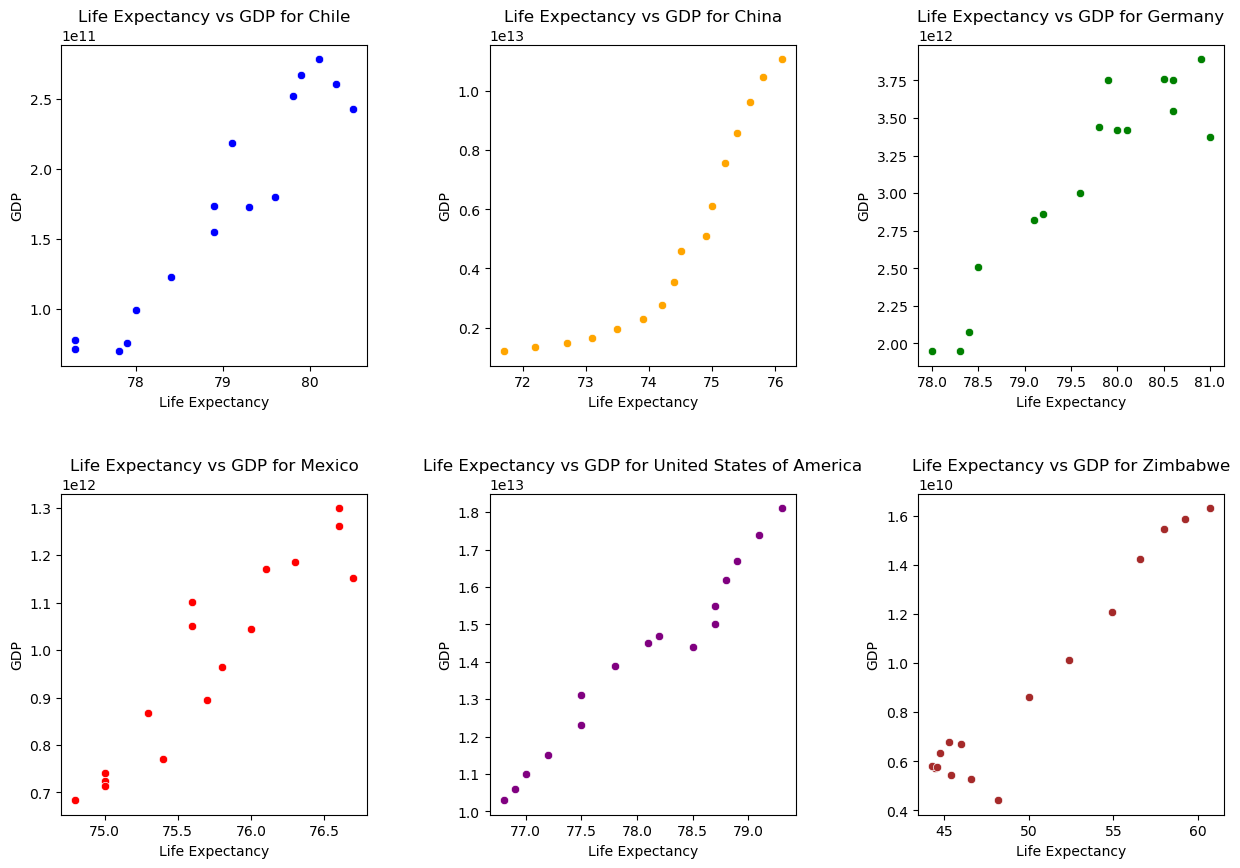

The correlation value for Chile is 0.9499 which indicates a strong, positive linear relationship between life expectancy and GDP.
The correlation value for China is 0.9085 which indicates a strong, positive linear relationship between life expectancy and GDP.
The correlation value for Germany is 0.9327 which indicates a strong, positive linear relationship between life expectancy and GDP.
The correlation value for Mexico is 0.9322 which indicates a strong, positive linear relationship between life expectancy and GDP.
The correlation value for United States of America is 0.9817 which indicates a strong, positive linear relationship between life expectancy and GDP.
The correlation value for Zimbabwe is 0.9662 which indicates a strong, positive linear relationship between life expectancy and GDP.


<Figure size 640x480 with 0 Axes>

In [4]:
data.rename(columns={'Life expectancy at birth (years)': 'Life Expectancy'}, inplace=True)

plt.figure(figsize=(15,10))
subplot_index = 1
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
countries = data['Country'].unique()
for country in countries:
    plt.subplot(2,3,subplot_index)
    sns.scatterplot(data=data[data['Country']==country], x='Life Expectancy', y='GDP', \
               color=colors[subplot_index-1])
    plt.title(f'Life Expectancy vs GDP for {country}')
    subplot_index+=1
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()
plt.clf()
for country in countries:
    corr_life_gdp, p = pearsonr(data[data['Country']==country]['Life Expectancy'], \
                                data[data['Country']==country]['GDP'])
    print(f'The correlation value for {country} is ' + str(round(corr_life_gdp, 4)) + 
    ' which indicates a strong, positive linear relationship between life expectancy and GDP.')

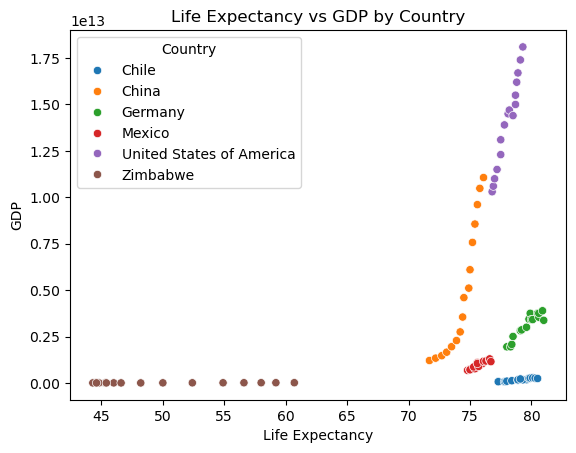

In the previous plot, we saw that there is a positive linear relationship between life expectancy and GDP. In this plot, we can see that the USA has the highest GDP and a high life expectancy, however, Chile and Germany seem to have higher life expectancies than the USA with a significantly lower GDP. There might be other factors in Chile and Germany that lead to a higher life expectancy.


In [5]:
sns.scatterplot(data=data, x='Life Expectancy', y='GDP', hue='Country')
plt.title('Life Expectancy vs GDP by Country')
plt.show()
print('In the previous plot, we saw that there is a positive linear relationship between life expectancy and GDP. In this plot, we can see that'
      ' the USA has the highest GDP and a high life expectancy, however, Chile and Germany seem to have higher life expectancies than the USA with a'
      ' significantly lower GDP. There might be other factors in Chile and Germany that lead to a higher life expectancy.')
      

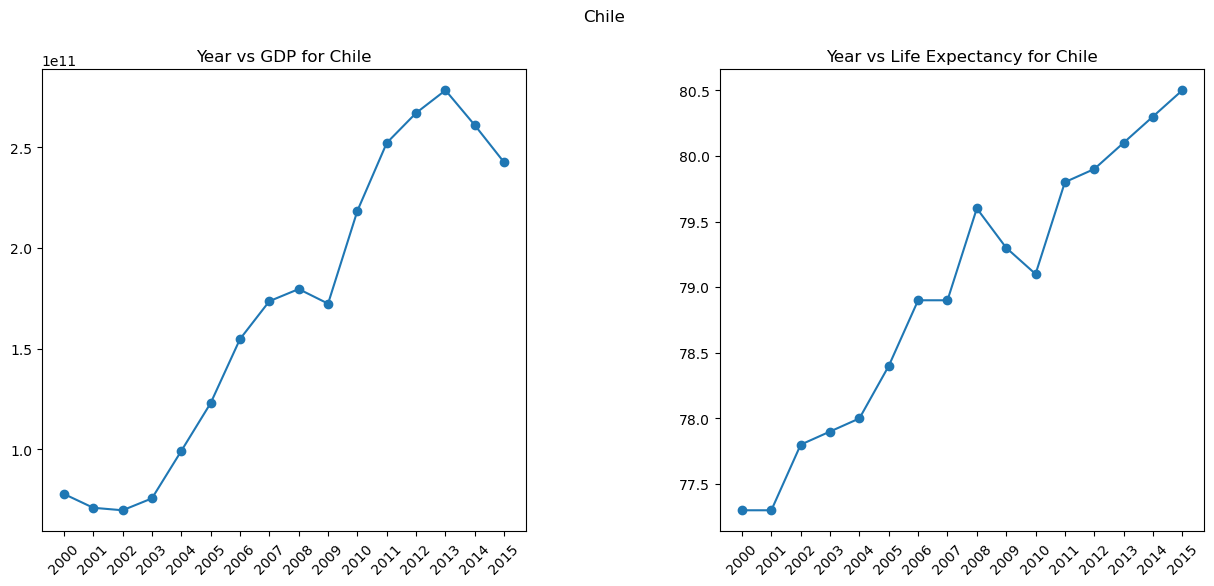

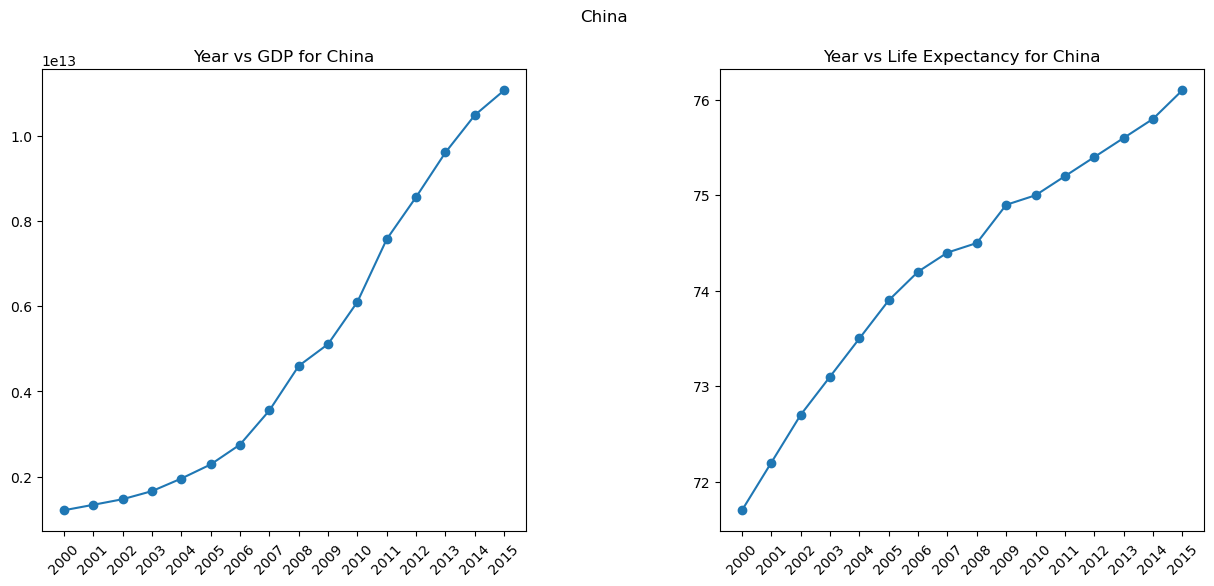

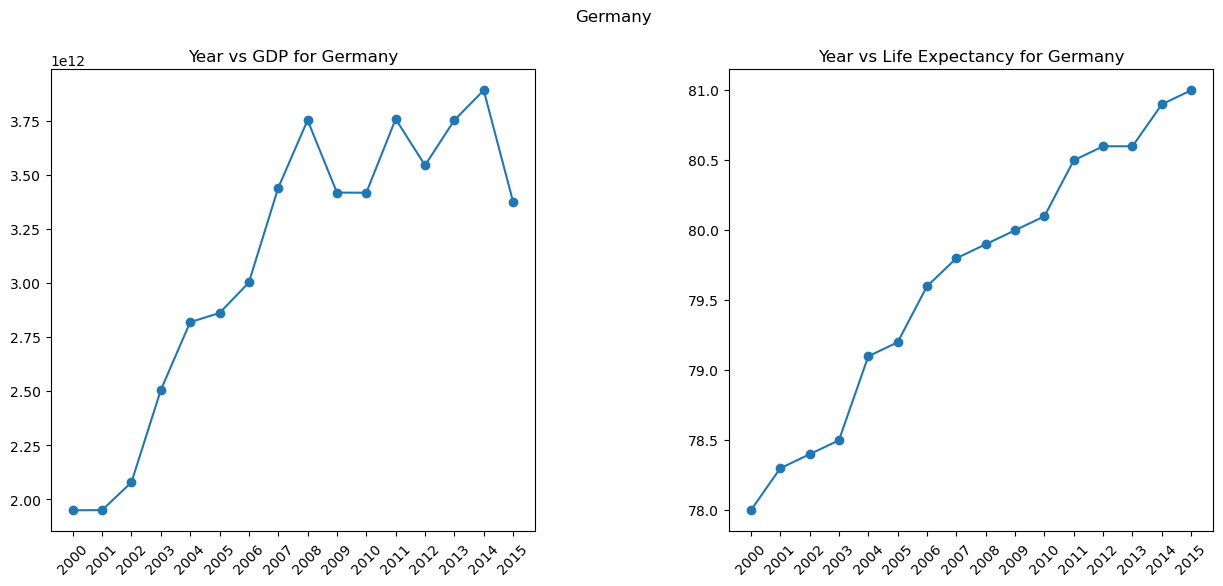

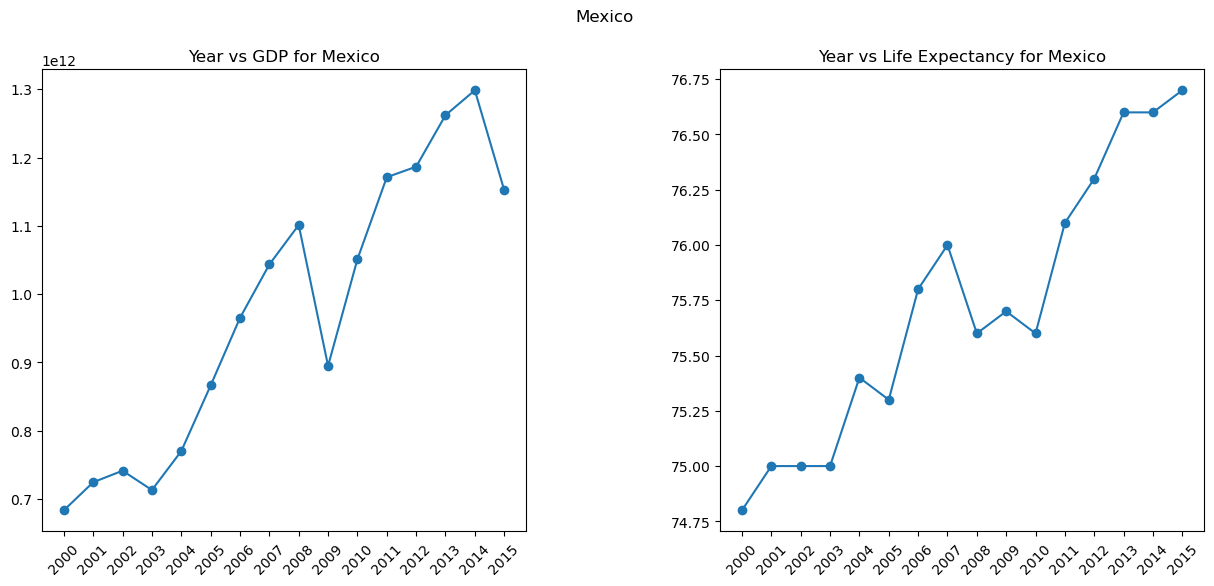

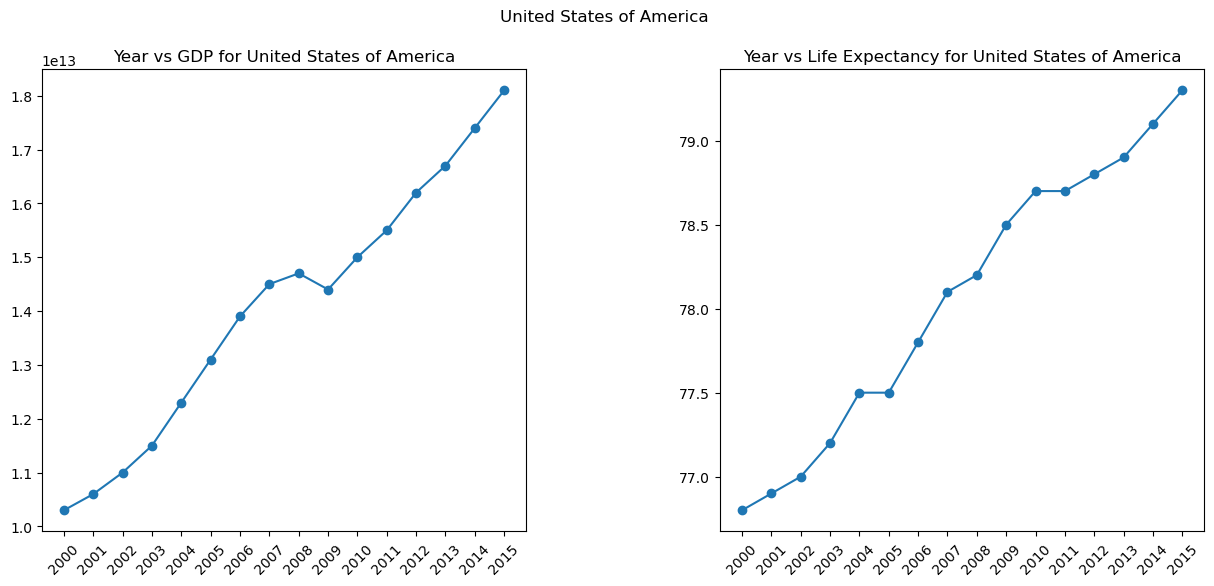

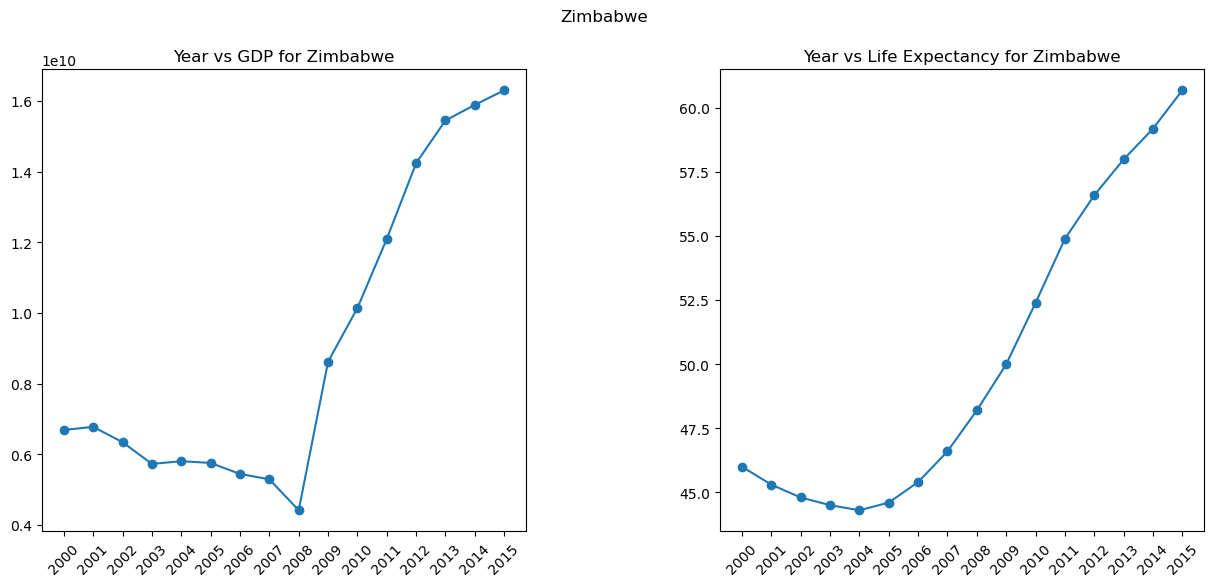

In each country, GDP has grown each year and so has life expectancy. Another indication that GDP and life expectancy are correlated. In Mexico in 2009, GDP dropped signficantly and so did life expectancy.


In [20]:
countries = data['Country'].unique()
years = data['Year'].unique()
for country in countries:
    plt.figure(figsize=(15,6))
    ax1 = plt.subplot(1,2,1)
    plt.plot(data[data['Country']==country]['Year'], data[data['Country']==country]['GDP'], marker='o')
    plt.title(f'Year vs GDP for {country}')
    ax1.set_xticks(years)
    ax1.set_xticklabels(years, rotation = 45)
    ax2 = plt.subplot(1,2,2)
    plt.plot(data[data['Country']==country]['Year'], data[data['Country']==country]['Life Expectancy'], marker='o')
    plt.title(f'Year vs Life Expectancy for {country}')
    ax2.set_xticks(years)
    ax2.set_xticklabels(years, rotation = 45)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    plt.suptitle(f'{country}')
    plt.show()
print('In each country, GDP has grown each year and so has life expectancy. Another indication that GDP and life expectancy are correlated.'
      ' In Mexico in 2009, GDP dropped signficantly and so did life expectancy.')

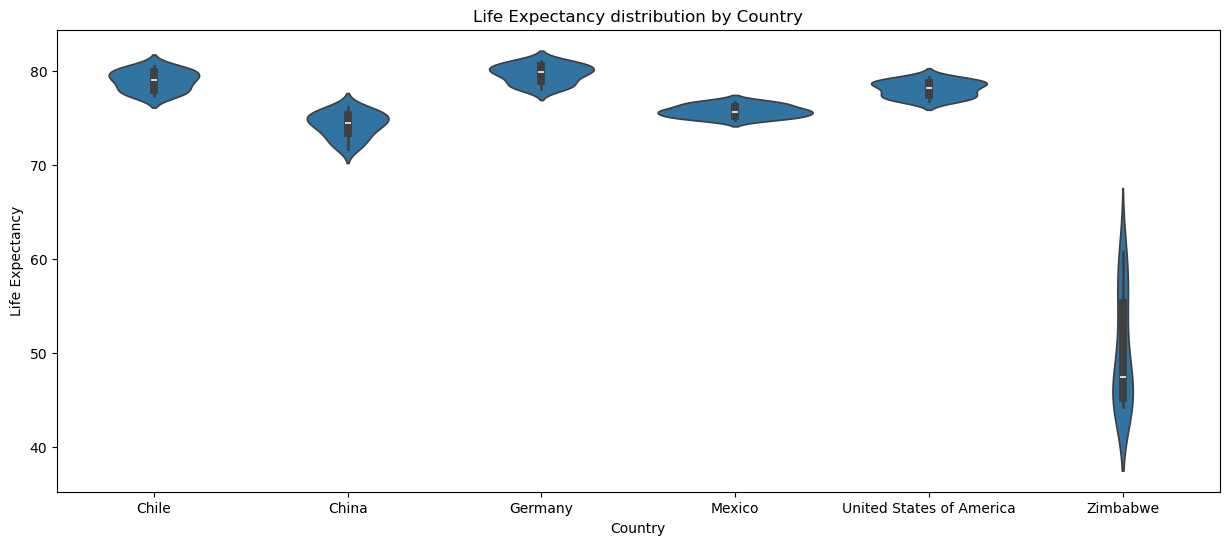

The average life expectancy in Chile is 50.09 and the average GDP is $9.06 billion.
The average life expectancy in China is 50.09 and the average GDP is $9.06 billion.
The average life expectancy in Germany is 50.09 and the average GDP is $9.06 billion.
The average life expectancy in Mexico is 50.09 and the average GDP is $9.06 billion.
The average life expectancy in United States of America is 50.09 and the average GDP is $9.06 billion.
The average life expectancy in Zimbabwe is 50.09 and the average GDP is $9.06 billion.


In [45]:
plt.figure(figsize=(15,6))
sns.violinplot(x='Country',y='Life Expectancy', data=data)
plt.title(f'Life Expectancy distribution by Country')
plt.show()
life_mean = np.mean(data[data['Country']==country]['Life Expectancy'])
gdp_mean = np.mean(data[data['Country']==country]['GDP'])
countries = data['Country'].unique()
for country in countries:
    print(f'The average life expectancy in {country} is ' + str(round(life_mean, 2)) + ' and the average GDP is $' + str(round(gdp_mean/1000000000, 2)) + ' billion.')